In [3]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
# from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os



In [4]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [5]:
import glob
import shutil
import os
# filenames = os.listdir("data/test_set")
src_dir = 'dataset/dogs_vs_cats/test/cats'
src_dir1 = 'dataset/dogs_vs_cats/test/dogs'
src_dir2 = 'dataset/dogs_vs_cats/train/cats'
src_dir3 = 'dataset/dogs_vs_cats/train/dogs'
categories = []
filename = []
for jpgfile in glob.iglob(os.path.join(src_dir, "*.jpg")):
    filename.append(jpgfile)
    categories.append(1)

for jpgfile in glob.iglob(os.path.join(src_dir1, "*.jpg")):
    filename.append(jpgfile)
    categories.append(0)

for jpgfile in glob.iglob(os.path.join(src_dir2, "*.jpg")):
    filename.append(jpgfile)
    categories.append(1)

for jpgfile in glob.iglob(os.path.join(src_dir3, "*.jpg")):
    filename.append(jpgfile)
    categories.append(0)

df = pd.DataFrame({
    'filename': filename,
    'category': categories
})



In [73]:
categories4 = []
filename4 = []
folderDirect = 'dataset_2'
for jpgfile in glob.iglob(os.path.join(folderDirect, "*.jpg")):
    if jpgfile.startswith('dataset_2/cat'):
        filename4.append(jpgfile)
        categories4.append(0)
    else:
        filename4.append(jpgfile)
        categories4.append(1)

df2 = pd.DataFrame({
    'filename': filename4,
    'category': categories4
})




In [113]:
categories6 = []
filename6 = []
ini = 'dataset_2/cats'
ini1 = 'dataset_2/dogs'
for jpgfile in glob.iglob(os.path.join(ini, "*.jpg")):
        filename6.append(jpgfile)
        categories6.append(0)

for jpgfile in glob.iglob(os.path.join(ini1, "*.jpg")):
        filename6.append(jpgfile)
        categories6.append(1)

df3 = pd.DataFrame({
    'filename': filename6,
    'category': categories6
})

In [115]:
df3.tail()

,filename,category
24995,dataset_2/dogs/dog.9316.jpg,1
24996,dataset_2/dogs/dog.6025.jpg,1
24997,dataset_2/dogs/dog.8008.jpg,1
24998,dataset_2/dogs/dog.1992.jpg,1
24999,dataset_2/dogs/dog.12412.jpg,1


In [81]:
df2.head()

,filename,category
0,dataset_2/dog.8011.jpg,dog
1,dataset_2/cat.5077.jpg,cat
2,dataset_2/dog.7322.jpg,dog
3,dataset_2/cat.2718.jpg,cat
4,dataset_2/cat.10151.jpg,cat


<AxesSubplot:>

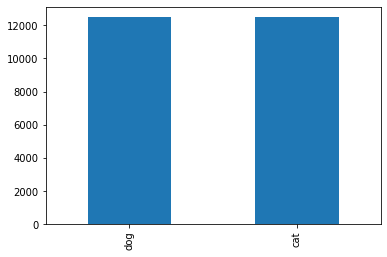

In [82]:
df2['category'].value_counts().plot.bar()

In [ ]:
import glob
import shutil
import os
# filenames = os.listdir("data/test_set")
src_dir = 'dataset/dogs_vs_cats/test/cats'
src_dir1 = 'dataset/dogs_vs_cats/test/dogs'
src_dir2 = 'dataset/dogs_vs_cats/train/cats'
src_dir3 = 'dataset/dogs_vs_cats/train/dogs'
categories = []
filename = []
for jpgfile in glob.iglob(os.path.join(src_dir, "*.jpg")):
    filename.removeprefix('dataset')

for jpgfile in glob.iglob(os.path.join(src_dir1, "*.jpg")):
    filename.append(jpgfile)
    categories.append(0)

for jpgfile in glob.iglob(os.path.join(src_dir2, "*.jpg")):
    filename.append(jpgfile)
    categories.append(1)

for jpgfile in glob.iglob(os.path.join(src_dir3, "*.jpg")):
    filename.append(jpgfile)
    categories.append(0)

df = pd.DataFrame({
    'filename': filename,
    'category': categories
})

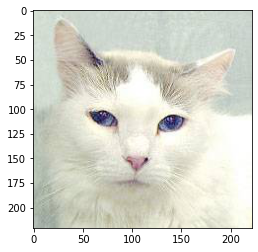

In [83]:
sample = random.choice(filename)
image = load_img(sample)
plt.imshow(image)

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

2021-11-12 14:36:59.875131: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

In [11]:
df["category"] = df["category"].replace({0: 'dog', 1: 'cat'}) 

In [13]:
df.tail()

,filename,category
24995,dataset/dogs_vs_cats/train/dogs/dog.9316.jpg,dog
24996,dataset/dogs_vs_cats/train/dogs/dog.6025.jpg,dog
24997,dataset/dogs_vs_cats/train/dogs/dog.8008.jpg,dog
24998,dataset/dogs_vs_cats/train/dogs/dog.1992.jpg,dog
24999,dataset/dogs_vs_cats/train/dogs/dog.12412.jpg,dog


In [14]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [23]:
train_df.head()

,filename,category
0,dataset/dogs_vs_cats/train/dogs/dog.3210.jpg,dog
1,dataset/dogs_vs_cats/train/dogs/dog.4350.jpg,dog
2,dataset/dogs_vs_cats/test/cats/cat.856.jpg,cat
3,dataset/dogs_vs_cats/train/cats/cat.3751.jpg,cat
4,dataset/dogs_vs_cats/test/cats/cat.2758.jpg,cat


In [119]:
train_df, validate_df = train_test_split(df3, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

<AxesSubplot:>

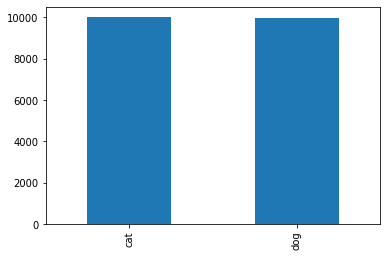

In [15]:
train_df['category'].value_counts().plot.bar()

<AxesSubplot:>

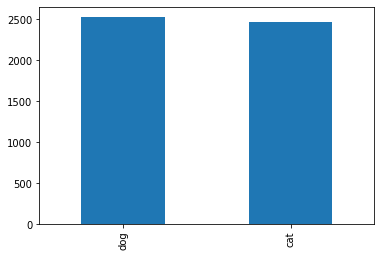

In [88]:
validate_df['category'].value_counts().plot.bar()

In [16]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [44]:
def move_images(initial_directory):
    for jpgfile in glob.iglob(os.path.join(initial_directory, "*.jpg")):
        shutil.copy(jpgfile, 'dataset_2')

move_images('dataset/dogs_vs_cats/test/cats')
move_images('dataset/dogs_vs_cats/test/dogs')
move_images('dataset/dogs_vs_cats/train/cats')
move_images('dataset/dogs_vs_cats/train/dogs')

In [90]:
train_df.head()

,filename,category
0,dataset_2/cat.11282.jpg,cat
1,dataset_2/cat.7693.jpg,cat
2,dataset_2/cat.4977.jpg,cat
3,dataset_2/dog.9403.jpg,dog
4,dataset_2/cat.10150.jpg,cat


In [106]:
def move_images(initial_directory, final_directory):
    for jpgfile in glob.iglob(os.path.join(initial_directory, "*.jpg")):
        shutil.copy(jpgfile, final_directory)

move_images('dataset/dogs_vs_cats/test/cats', 'dataset_2/cats')
move_images('dataset/dogs_vs_cats/train/cats', 'dataset_2/cats')
move_images('dataset/dogs_vs_cats/test/dogs', 'dataset_2/dogs')
move_images('dataset/dogs_vs_cats/train/dogs', 'dataset_2/dogs')
        

        



In [139]:
move_images('dataset_2/cats', 'dataset_3')
move_images('dataset_2/dogs', 'dataset_3')

In [22]:
categories7 = []
filename7 = []
ini2 = 'dataset_3'
for jpgfile in glob.iglob(os.path.join(ini2, "*.jpg")):
    if jpgfile.startswith('dataset_3/cat'):
        namefixjpg = jpgfile.removeprefix('dataset_3/')
        filename7.append(namefixjpg)
        categories7.append(0)
    else:
        namefixjpg = jpgfile.removeprefix('dataset_3/')
        filename7.append(namefixjpg)
        categories7.append(1)

df4 = pd.DataFrame({
    'filename': filename7,
    'category': categories7
})


In [162]:
df4["category"] = df4["category"].replace({0: 'cat', 1: 'dog'}) 
df4.head()

,filename,category
0,dog.8011.jpg,dog
1,cat.5077.jpg,cat
2,dog.7322.jpg,dog
3,cat.2718.jpg,cat
4,cat.10151.jpg,cat


In [163]:
train_df, validate_df = train_test_split(df4, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [17]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [30]:

for jpgfile in glob.iglob(os.path.join('dataset', "*.jpg")):
    jpgfile = jpgfile.removeprefix('dataset')
    train_df.append(jpgfile)



TypeError: cannot concatenate object of type '<class 'str'>'; only Series and DataFrame objs are valid

In [33]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)


train_generator = train_datagen.flow_from_dataframe( 
    train_df,
    # directory='dataset', 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size,
    validate_filenames=False
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    # directory='dataset', 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size,
    validate_filenames=False
)



Found 20000 non-validated image filenames belonging to 2 classes.
Found 5000 non-validated image filenames belonging to 2 classes.


In [28]:
train_df.head()

,filename,category
0,dataset/dogs_vs_cats/train/dogs/dog.3210.jpg,dog
1,dataset/dogs_vs_cats/train/dogs/dog.4350.jpg,dog
2,dataset/dogs_vs_cats/test/cats/cat.856.jpg,cat
3,dataset/dogs_vs_cats/train/cats/cat.3751.jpg,cat
4,dataset/dogs_vs_cats/test/cats/cat.2758.jpg,cat


In [166]:
validate_df.head()

,filename,category
0,cat.1474.jpg,cat
1,dog.11287.jpg,dog
2,dog.8276.jpg,dog
3,cat.7227.jpg,cat
4,cat.2997.jpg,cat


In [34]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    'dataset_2', 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical')

Found 0 validated image filenames belonging to 0 classes.


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras_preprocessing/image/dataframe_iterator.py:279: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


In [31]:
import numpy as np

def my_preprocessing_func(img):
    image = np.array(img)
    return image / 255

genNorm = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
       height_shift_range=0.1, zoom_range=0.1, horizontal_flip=True, 
       preprocessing_function=my_preprocessing_func)

In [36]:
history = model.fit(
    train_generator, 
    epochs=5,
    steps_per_epoch = 10,
    validation_data=validation_generator)

Epoch 1/5
10/10 [==============================] - 45s 5s/step - loss: 1.4381 - accuracy: 0.5000 - val_loss: 0.8871 - val_accuracy: 0.5108
Epoch 2/5
10/10 [==============================] - 57s 6s/step - loss: 1.2003 - accuracy: 0.5933 - val_loss: 3.1047 - val_accuracy: 0.5044
Epoch 3/5
10/10 [==============================] - 57s 6s/step - loss: 1.4524 - accuracy: 0.5533 - val_loss: 5.0070 - val_accuracy: 0.5044
Epoch 4/5
10/10 [==============================] - 59s 6s/step - loss: 1.3979 - accuracy: 0.5333 - val_loss: 3.0200 - val_accuracy: 0.5044
Epoch 5/5
10/10 [==============================] - 57s 6s/step - loss: 1.2615 - accuracy: 0.6067 - val_loss: 1.4467 - val_accuracy: 0.5044


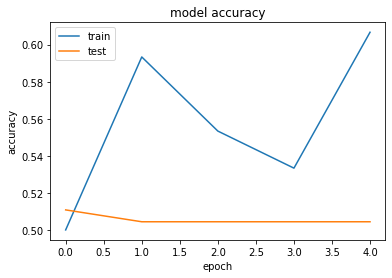

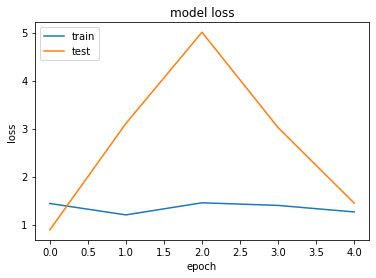

In [39]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Populating the interactive namespace from numpy and matplotlib


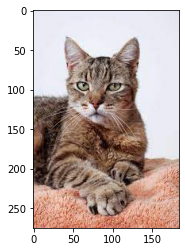

dog
[[0.04206434 0.95793563]]


In [44]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from skimage import transform
import numpy as np
from keras.preprocessing import image

def load(filename):
 np_image = Image.open(filename)
 np_image = np.array(np_image).astype('float32')/255
 np_image = transform.resize(np_image, (128,128,3))
 np_image = np.expand_dims(np_image, axis=0)
 return np_image

image = 'img/download-1.jpg'
image_load = load(image)
result = model.predict(image_load) 
if result[0][0] > 0.5:
    prediction = 'cat'
else:
    prediction = 'dog'


img2 = mpimg.imread(image)
imgplot = plt.imshow(img2)
plt.show()

print(prediction)
print(result)

IndexError: index 0 is out of bounds for axis 0 with size 0

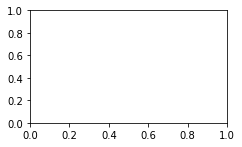

In [124]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [133]:
import cv2
from PIL import Image
from skimage import transform
path = 'dataset_2/cats/cat.0.jpg'
image = cv2.imread(path) 

start_point = (5, 5) 
end_point = (220, 220) 
  
# Blue color in BGR 
color = (255, 0, 0) 
  
# Line thickness of 2 px 
thickness = 2
  
# Using cv2.rectangle() method 
# Draw a rectangle with blue line borders of thickness of 2 px 
image = cv2.rectangle(image, start_point, end_point, color, thickness) 

cv2.imshow('image', image)





